In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import time
import os

In [2]:
# this isn't necessary for the actual stuff being done below just for testing purposes
def plot_kps(keypoints):
    i = 0
    while(i < len(keypoints)):
        if keypoints[i] >= 0:
            print(keypoints[i], keypoints[i+1])
            plt.plot(keypoints[i],keypoints[i+1],marker='o',color='red')
        i+=2

In [4]:
data = pd.read_csv('./mpii_dataset.csv')
newData = []
for j in range(0,len(data)):
    if j%500==0:
        print(j)
#     reading in name of original image and image itself
    name = str(data.iloc[j,1])
    img = cv2.imread('./images/' + name)
#     retrieving original images shape and keypoints
    shape = img.shape
    keypoints = data.iloc[j,2:-3]
#     start building our row, the data in the csv will consist of filename,keypoints(32)
    row = []
    row.append(name)
#     find ymin,ymax,xmin,xmax values to find respectable bounding boxes
    xmin = 100000
    xmax = 0
    ymin = 100000
    ymax = 0
    for i in range(0,len(keypoints)):
    #     keypoints are -1 if it is not visible, don't want our mins to be -1
        if keypoints[i] >= 0:
            if i%2==0:
#                 slight rounding for converting to ints but half a pixel or so shouldn't be a problem
                if xmin > keypoints[i]:
                    xmin = int(keypoints[i])
                if xmax < keypoints[i]:
                    xmax = int(keypoints[i])
            else:
                if ymin > keypoints[i]:
                    ymin = int(keypoints[i])
                if ymax < keypoints[i]:
                    ymax = int(keypoints[i])

#     add 20 pixels in all directions to the bounding box so we have slightly more room to work with
    if ymin-20 >= 0:
        ymin-=20
    if ymax+20 <= shape[0]:
        ymax+=20
    if xmin-20 >= 0:
        xmin-=20
    if xmax+20 <= shape[1]:
        xmax+=20
    
#     adjust keypoints through their respective mins for y and x
    for i in range(0, len(keypoints)):
        if keypoints[i] >= 0:
            if i%2==0:
                keypoints[i]-=xmin
            else:
                keypoints[i]-=ymin
#         finish building our row in this loop
        row.append(keypoints[i])
#     resize image to the persons bounding box plus 20 pixels outward
    img = img[ymin:ymax,xmin:xmax]
#     write image to a new folder with the same name
    cv2.imwrite('./singleImages/'+name,img)
#     append our row weve been building with the fileanme and keypoints into our array
    newData.append(row)

# covert the 2d array into a dataframe and write dataframe to directory as 'adjusted.csv'
labels = ['NAME','r ankle_X','r ankle_Y', 'r knee_X','r knee_Y', 'r hip_X','r hip_Y', 'l hip_X','l hip_Y', 'l knee_X','l knee_Y', 'l ankle_X','l ankle_Y','pelvis_X','pelvis_Y','thorax_X','thorax_Y','upper neck_X','upper neck_Y', 'head top_X','head top_Y', 'r wrist_X','r wrist_Y','r elbow_X','r elbow_Y', 'r shoulder_X','r shoulder_Y','l shoulder_X','l shoulder_Y','l elbow_X','l elbow_Y', 'l wrist_X','l wrist_Y']
newData = pd.DataFrame(columns=labels, data=newData)
newData.to_csv('adjusted.csv')

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000


# Testing

17372
109.0 307.0
129.0 218.0
142.0 121.0
75.0 123.0
61.0 232.0
69.0 316.0
109.0 122.0
69.0 44.0
61.6384 40.4507
20.3616 20.5493
105.0 142.0
130.0 81.0
108.0 38.0
29.0 49.0
43.0 113.0
46.0 156.0


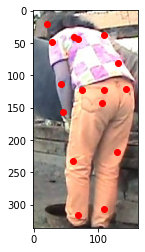

In [11]:
df = pd.read_csv('adjusted.csv')
print(len(df))
file = df.iloc[102,1:2][0]
kps = np.array(df.iloc[102,2:]).astype('float32')
imgfile = cv2.imread('./singleImages/' + file)
plot_kps(kps)
plt.imshow(imgfile,cmap="gray")